<a href="https://colab.research.google.com/github/naikshrey2308/ML_Labs/blob/main/ML_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Machine Learning Lab-2

Data Preprocessing

In [ ]:
# Import the libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

In [ ]:
dataset = pd.read_csv("drive/MyDrive/Exercise-CarData.csv")
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
2,2,13950,24.0,41711,Diesel,90,NaN,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,1431,7500,NaN,20544,Petrol,86,1.0,0,1300,3,1025
1432,1432,10845,72.0,??,Petrol,86,0.0,0,1300,3,1015
1433,1433,8500,NaN,17016,Petrol,86,0.0,0,1300,3,1015
1434,1434,7250,70.0,??,NaN,86,1.0,0,1300,3,1015


In [ ]:
# Make the data ready for transformation

# check if the rows contain non-numerical data
filter = dataset["KM"].str.contains(r"\D+")
dataset = dataset[~filter]
filter = dataset["HP"].str.contains(r"\D+")
dataset = dataset[~filter]

# remove the records with NaN value
dataset.dropna(axis=0, how='any', inplace=True)
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,Diesel,90,1.0,0,2000,three,1165
1,1,13750,23.0,72937,Diesel,90,1.0,0,2000,3,1165
3,3,14950,26.0,48000,Diesel,90,0.0,0,2000,3,1165
4,4,13750,30.0,38500,Diesel,90,0.0,0,2000,3,1170
5,5,12950,32.0,61000,Diesel,90,0.0,0,2000,3,1170
...,...,...,...,...,...,...,...,...,...,...,...
1423,1423,7950,80.0,35821,Petrol,86,0.0,1,1300,3,1015
1424,1424,7750,73.0,34717,Petrol,86,0.0,0,1300,3,1015
1429,1429,8950,78.0,24000,Petrol,86,1.0,1,1300,5,1065
1430,1430,8450,80.0,23000,Petrol,86,0.0,0,1300,3,1015


> 💡 We have now filtered the data for the features that are normal (continuous). We now need to filter the data for the features that are labelled.

> The data which can be labelled here includes `FuelType, MetColor, Automatic, Doors`.

In [ ]:
# Filter out the labelled data

le = LabelEncoder()
labelled_features = [4,6,7,9]
for i in labelled_features:
    dataset.iloc[ : , i] = le.fit_transform(dataset.iloc[ : , i].values)
dataset

,Unnamed: 0,Price,Age,KM,FuelType,HP,MetColor,Automatic,CC,Doors,Weight
0,0,13500,23.0,46986,1,90,1,0,2000,6,1165
1,1,13750,23.0,72937,1,90,1,0,2000,1,1165
3,3,14950,26.0,48000,1,90,0,0,2000,1,1165
4,4,13750,30.0,38500,1,90,0,0,2000,1,1170
5,5,12950,32.0,61000,1,90,0,0,2000,1,1170
...,...,...,...,...,...,...,...,...,...,...,...
1423,1423,7950,80.0,35821,2,86,0,1,1300,1,1015
1424,1424,7750,73.0,34717,2,86,0,0,1300,1,1015
1429,1429,8950,78.0,24000,2,86,1,1,1300,3,1065
1430,1430,8450,80.0,23000,2,86,0,0,1300,1,1015


In [ ]:
# Create dummy columns for the labelled data

# For FuelType
dummy = pd.get_dummies(dataset["FuelType"])
# print(dummy[0])
# onehotencoder = OneHotEncoder()
# x = onehotencoder.fit_transform(dataset["FuelType"].values.reshape(-1,1)).toarray()
# x = pd.DataFrame(x, columns=["Fuel_" + str(int(i)) for i in range(dataset["FuelType"].max() + 1)])
dataset = dataset.drop(["FuelType"], axis=1)
dataset = pd.concat([dataset, dummy], axis=1)
dataset.columns = [*dataset.columns[:-dummy.shape[1]], *["Fuel_" + str(i) for i in range(dummy.shape[1])]]

# For MetColor
dummy = pd.get_dummies(dataset["MetColor"])
dataset = dataset.drop(["MetColor"], axis=1)
dataset = pd.concat([dataset, dummy], axis=1)
dataset.columns = [*dataset.columns[:-dummy.shape[1]], *["MetColor_" + str(i) for i in range(dummy.shape[1])]]

# For Automatic
dummy = pd.get_dummies(dataset["Automatic"])
dataset = dataset.drop(["Automatic"], axis=1)
dataset = pd.concat([dataset, dummy], axis=1)
dataset.columns = [*dataset.columns[:-dummy.shape[1]], *["Automatic_" + str(i) for i in range(dummy.shape[1])]]

# For MetColor
dummy = pd.get_dummies(dataset["Doors"])
dataset = dataset.drop(["Doors"], axis=1)
dataset = pd.concat([dataset, dummy], axis=1)
dataset.columns = [*dataset.columns[:-dummy.shape[1]], *["Doors_" + str(i) for i in range(dummy.shape[1])]]

dataset

,Unnamed: 0,Price,Age,KM,HP,CC,Weight,Fuel_0,Fuel_1,Fuel_2,...,MetColor_1,Automatic_0,Automatic_1,Doors_0,Doors_1,Doors_2,Doors_3,Doors_4,Doors_5,Doors_6
0,0,13500,23.0,46986,90,2000,1165,0,1,0,...,1,1,0,0,0,0,0,0,0,1
1,1,13750,23.0,72937,90,2000,1165,0,1,0,...,1,1,0,0,1,0,0,0,0,0
3,3,14950,26.0,48000,90,2000,1165,0,1,0,...,0,1,0,0,1,0,0,0,0,0
4,4,13750,30.0,38500,90,2000,1170,0,1,0,...,0,1,0,0,1,0,0,0,0,0
5,5,12950,32.0,61000,90,2000,1170,0,1,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,1423,7950,80.0,35821,86,1300,1015,0,0,1,...,0,0,1,0,1,0,0,0,0,0
1424,1424,7750,73.0,34717,86,1300,1015,0,0,1,...,0,1,0,0,1,0,0,0,0,0
1429,1429,8950,78.0,24000,86,1300,1065,0,0,1,...,1,0,1,0,0,0,1,0,0,0
1430,1430,8450,80.0,23000,86,1300,1015,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [ ]:
# Seperate the input and output

X = dataset.iloc[:, 2:]
y = dataset.iloc[:, 1:2]

X_transformable = X.iloc[:, :5]
X_transformable

,Age,KM,HP,CC,Weight
0,23.0,46986,90,2000,1165
1,23.0,72937,90,2000,1165
3,26.0,48000,90,2000,1165
4,30.0,38500,90,2000,1170
5,32.0,61000,90,2000,1170
...,...,...,...,...,...
1423,80.0,35821,86,1300,1015
1424,73.0,34717,86,1300,1015
1429,78.0,24000,86,1300,1065
1430,80.0,23000,86,1300,1015


In [ ]:
# Start the filteration

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_transformable)
X_scaled

array([[0.27848101, 0.19335471, 0.17073171, 1.        , 0.26829268],
       [0.27848101, 0.30014938, 0.17073171, 1.        , 0.26829268],
       [0.3164557 , 0.19752756, 0.17073171, 1.        , 0.26829268],
       ...,
       [0.97468354, 0.09876172, 0.13821138, 0.        , 0.10569106],
       [1.        , 0.09464648, 0.13821138, 0.        , 0.02439024],
       [0.94936709, 0.        , 0.33333333, 0.42857143, 0.18536585]])

In [ ]:
# Standardized Scaler

scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X_transformable)
X_std

array([[-1.74742228, -0.58556891, -0.78567699,  2.33928517,  1.76838158],
       [-1.74742228,  0.09639568, -0.78567699,  2.33928517,  1.76838158],
       [-1.58691932, -0.55892207, -0.78567699,  2.33928517,  1.76838158],
       ...,
       [ 1.19513199, -1.18961646, -1.05185999, -1.45881183, -0.16252374],
       [ 1.30213396, -1.21589539, -1.05185999, -1.45881183, -1.12797639],
       [ 1.08813001, -1.82028457,  0.54523798,  0.16894403,  0.78361987]])

In [ ]:
# Using imputer

X_transformable2 = X.iloc[:, :5]
X_transformable2

,Age,KM,HP,CC,Weight
0,23.0,46986,90,2000,1165
1,23.0,72937,90,2000,1165
3,26.0,48000,90,2000,1165
4,30.0,38500,90,2000,1170
5,32.0,61000,90,2000,1170
...,...,...,...,...,...
1423,80.0,35821,86,1300,1015
1424,73.0,34717,86,1300,1015
1429,78.0,24000,86,1300,1065
1430,80.0,23000,86,1300,1015


In [ ]:
imputer = SimpleImputer(strategy="mean", missing_values=np.nan)
imputer = imputer.fit(X_transformable2)
X_transformable2 = imputer.transform(X_transformable2)
X_transformable2

array([[2.3000e+01, 4.6986e+04, 9.0000e+01, 2.0000e+03, 1.1650e+03],
       [2.3000e+01, 7.2937e+04, 9.0000e+01, 2.0000e+03, 1.1650e+03],
       [2.6000e+01, 4.8000e+04, 9.0000e+01, 2.0000e+03, 1.1650e+03],
       ...,
       [7.8000e+01, 2.4000e+04, 8.6000e+01, 1.3000e+03, 1.0650e+03],
       [8.0000e+01, 2.3000e+04, 8.6000e+01, 1.3000e+03, 1.0150e+03],
       [7.6000e+01, 1.0000e+00, 1.1000e+02, 1.6000e+03, 1.1140e+03]])

Correlation

In [ ]:
import seaborn as sns

X_corr = X
X_corr.head()

,Age,KM,HP,CC,Weight,Fuel_0,Fuel_1,Fuel_2,MetColor_0,MetColor_1,Automatic_0,Automatic_1,Doors_0,Doors_1,Doors_2,Doors_3,Doors_4,Doors_5,Doors_6
0,23.0,46986,90,2000,1165,0,1,0,0,1,1,0,0,0,0,0,0,0,1
1,23.0,72937,90,2000,1165,0,1,0,0,1,1,0,0,1,0,0,0,0,0
3,26.0,48000,90,2000,1165,0,1,0,1,0,1,0,0,1,0,0,0,0,0
4,30.0,38500,90,2000,1170,0,1,0,1,0,1,0,0,1,0,0,0,0,0
5,32.0,61000,90,2000,1170,0,1,0,1,0,1,0,0,1,0,0,0,0,0


In [ ]:
corr = X_corr.corr()
corr.head()

,Age,CC,Weight,Fuel_0,Fuel_1,Fuel_2,MetColor_0,MetColor_1,Automatic_0,Automatic_1,Doors_0,Doors_1,Doors_2,Doors_3,Doors_4,Doors_5,Doors_6
Age,1.000000,-0.084851,-0.442295,0.011756,-0.052639,0.046611,0.106291,-0.106291,-0.026304,0.026304,0.028225,0.139324,0.094928,-0.184603,-0.026938,-0.067358,-0.052807
CC,-0.084851,1.000000,0.623643,0.017680,0.762497,-0.736090,-0.009902,0.009902,0.053516,-0.053516,0.018823,-0.129295,0.029173,0.104819,0.005105,0.005105,0.070693
Weight,-0.442295,0.623643,1.000000,0.057223,0.539223,-0.535038,-0.055382,0.055382,-0.069788,0.069788,-0.006949,-0.252085,-0.162776,0.335281,0.000924,0.044688,0.053440
Fuel_0,0.011756,0.017680,0.057223,1.000000,-0.036199,-0.289340,0.001501,-0.001501,0.024871,-0.024871,-0.004499,-0.001037,-0.032413,0.020230,-0.003180,-0.003180,-0.003180
Fuel_1,-0.052639,0.762497,0.539223,-0.036199,1.000000,-0.946125,0.032313,-0.032313,0.081326,-0.081326,0.054783,-0.047436,-0.000577,0.038461,-0.010397,-0.010397,0.087837


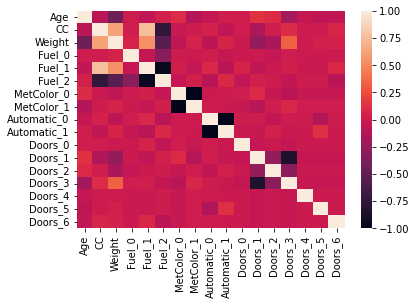

In [ ]:
sns.heatmap(corr)

In [ ]:
columns_filter = np.full((corr.shape[0] + 1,), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.75:
            if columns_filter[j]:
                columns_filter[j] = False

selected_columns = X_corr.columns[columns_filter]
selected_columns.shape
X_corr = X_corr[selected_columns]
X_corr

,Age,KM,HP,CC,Fuel_1,Fuel_2,MetColor_0,MetColor_1,Automatic_0,Automatic_1,Doors_0,Doors_1,Doors_2,Doors_3,Doors_4,Doors_5,Doors_6
0,23.0,46986,90,2000,1,0,0,1,1,0,0,0,0,0,0,0,1
1,23.0,72937,90,2000,1,0,0,1,1,0,0,1,0,0,0,0,0
3,26.0,48000,90,2000,1,0,1,0,1,0,0,1,0,0,0,0,0
4,30.0,38500,90,2000,1,0,1,0,1,0,0,1,0,0,0,0,0
5,32.0,61000,90,2000,1,0,1,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,80.0,35821,86,1300,0,1,1,0,0,1,0,1,0,0,0,0,0
1424,73.0,34717,86,1300,0,1,1,0,1,0,0,1,0,0,0,0,0
1429,78.0,24000,86,1300,0,1,0,1,0,1,0,0,0,1,0,0,0
1430,80.0,23000,86,1300,0,1,1,0,1,0,0,1,0,0,0,0,0
